In [80]:
# Find the current directory
import os
print(os.getcwd())

/Users/stephaniezhou/Desktop/DS/Music-Therapy-Recommendation-Engine


In [81]:
# Change the working directory
os.chdir('/Users/stephaniezhou/Desktop/DS/Music-Therapy-Recommendation-Engine')

### Loading Data and Importing Libraries

In [82]:
# Load the music and mental survey dataset
csv_path = 'data/mxmh_survey_results.csv'
df = pd.read_csv(csv_path)

print("Data loaded successfully! ")


Data loaded successfully! 


In [83]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df.head(10)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
7,8/27/2022 22:18:59,21.0,Spotify,1.0,Yes,No,No,K pop,Yes,Yes,...,Sometimes,Rarely,Never,Rarely,5.0,3.0,5.0,3.0,Improve,I understand.
8,8/27/2022 22:33:05,19.0,Spotify,6.0,Yes,No,No,Rock,No,No,...,Never,Never,Very frequently,Never,2.0,0.0,0.0,0.0,Improve,I understand.
9,8/27/2022 22:44:03,18.0,I do not use a streaming service.,1.0,Yes,No,No,R&B,Yes,Yes,...,Sometimes,Rarely,Sometimes,Sometimes,2.0,2.0,5.0,1.0,Improve,I understand.


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

### Find Missing Data

BPM                             107
Music effects                     8
Instrumentalist                   4
Foreign languages                 4
While working                     3
Primary streaming service         1
Composer                          1
Age                               1
Frequency [Video game music]      0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Timestamp                         0
Anxiety                           0
Depression                        0
Frequency [Lofi]                  0
Insomnia                          0
OCD                               0
Frequency [Metal]                 0
Frequency [Hip hop]               0
Frequency [Latin]                 0
Frequency [K pop]                 0
Frequency [Jazz]                  0
Frequency [Gospel]                0
Frequency [Folk]                  0
Frequency [EDM]                   0
Frequency [Country]         

Text(0, 0.5, 'Number of Null Values')

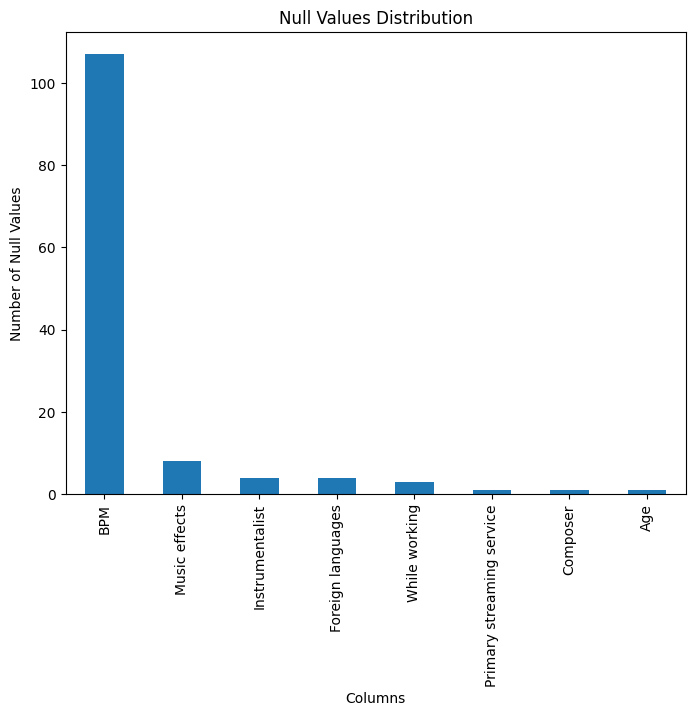

In [86]:
# Check if there is missing data
null_counts = df.isnull().sum().sort_values(ascending=False)
print(null_counts)

# Since only 8 of the columns have null values, extract these 8 columns with missing data
top8_null = null_counts.head(8)

# Plot a bar chart of null values
top8_null.plot(kind="bar", figsize=(8, 6))
plt.title("Null Values Distribution")
plt.xlabel("Columns")
plt.ylabel("Number of Null Values")

Thus, there is missing data in 8 out of the 33 features, including BPM, Music effects, Instrumentalist, Foreign Languages, While working, Primary streaming service, Composer, and Age. 

Among these, BPM has the most missing data.

### Data Distribution

In [87]:
# Calculate skewness of BPM
skewness = df['BPM'].skew()
print(f'Skewness of BPM: {skewness}')

# Calculate skewness of Age
skewness = df['Age'].skew()
print(f'Skewness of Age: {skewness}')


Skewness of BPM: 25.079872407932218
Skewness of Age: 2.1249225692618467


### Age Distribution

In [88]:
# Find statistical distribution of the age column
df['Age'].describe()

count    735.000000
mean      25.206803
std       12.054970
min       10.000000
25%       18.000000
50%       21.000000
75%       28.000000
max       89.000000
Name: Age, dtype: float64

In [89]:
# Find median of age
median_age = df['Age'].median()
print("The median of age is:", median_age)

The median of age is: 21.0


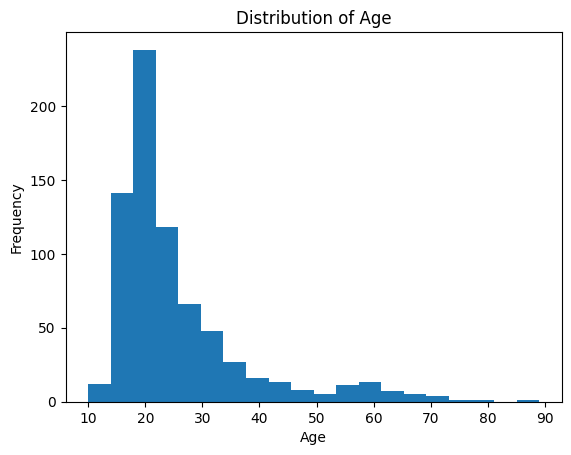

In [90]:
# Histogram of age distribution
ax = plt.axes()
ax.hist(df.Age, bins=20);

ax.set(xlabel='Age', 
       ylabel='Frequency',
       title='Distribution of Age');

Text(0.5, 1.0, 'Age Distribution')

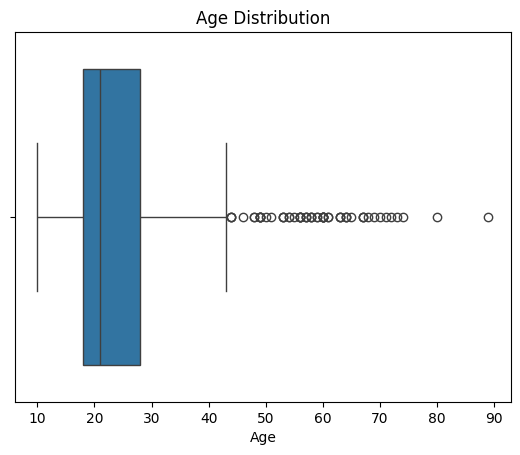

In [91]:
# Box plot of age distribution
sns.boxplot(x=df['Age'])
plt.title("Age Distribution")

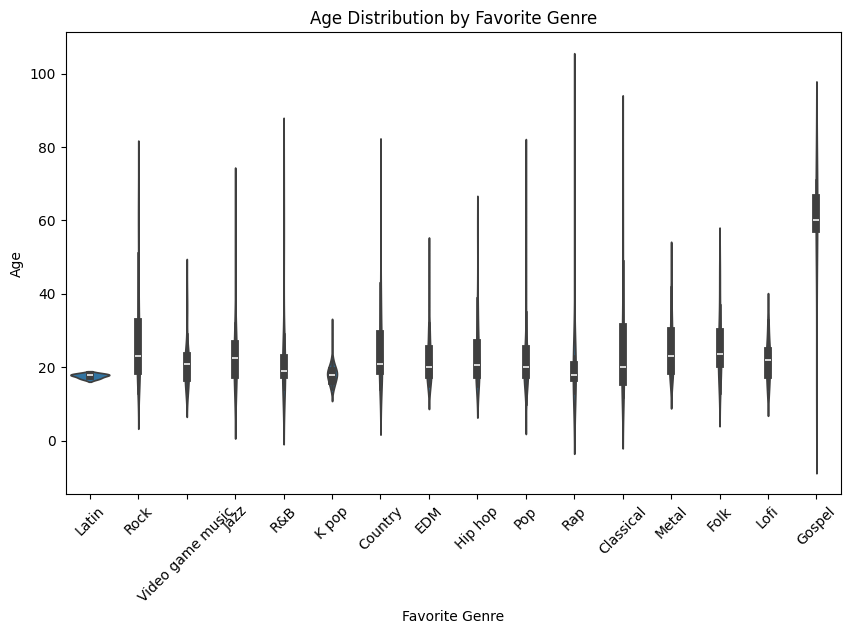

In [92]:
# Violin plot – Relationship between favorite genre and age
plt.figure(figsize=(10, 6))
sns.violinplot(x='Fav genre', y='Age', data=df)
plt.title('Age Distribution by Favorite Genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

The above violin plot shows that music genres like K-pop and Lofi have younger audience, while genres like Classical, Gospel, and Metal have a wider range of ages.

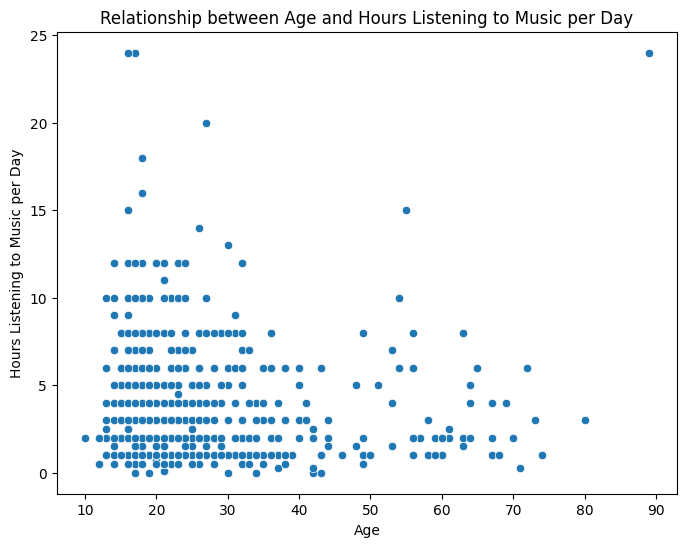

In [93]:
# Scatter Plot – Relationship between the number of hours listening to music per day and age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Hours per day', data=df)
plt.title('Relationship between Age and Hours Listening to Music per Day')
plt.xlabel('Age')
plt.ylabel('Hours Listening to Music per Day')
plt.show()

According to the scatter plot above, there is a dense cluster of data points around the younger age groups (especially between ages 15 and 30). The younger respondants tend to spend more hours listening to music per day compared to older respondants.

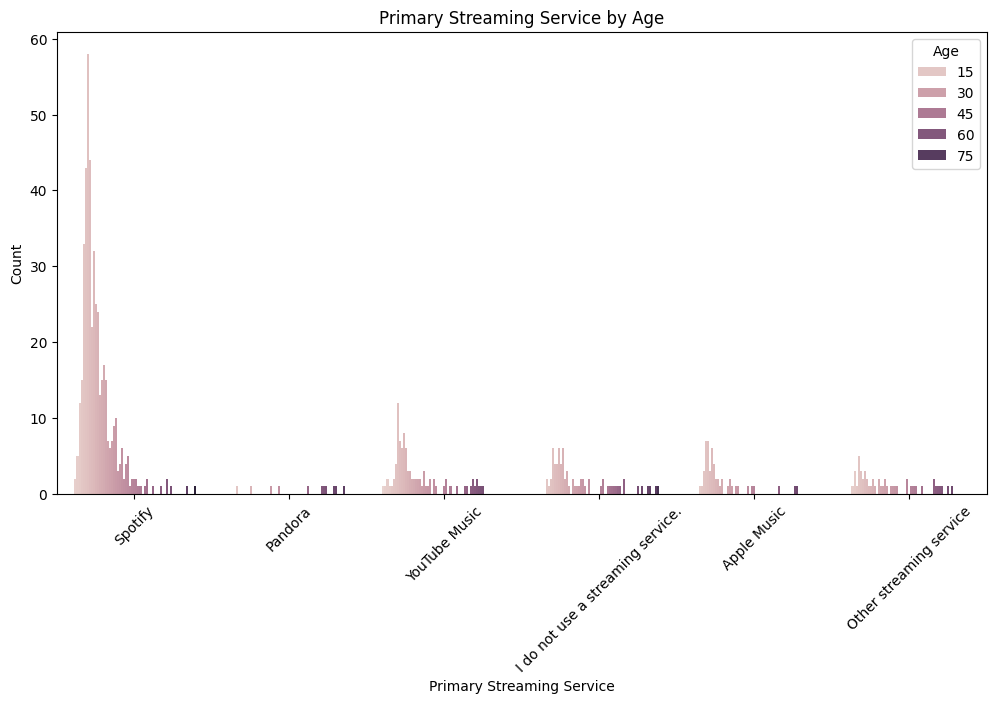

In [94]:
# Countplot – Relationship between the primary streaming service and age
plt.figure(figsize=(12, 6))
sns.countplot(x='Primary streaming service', hue='Age', data=df)
plt.title('Primary Streaming Service by Age')
plt.xlabel('Primary Streaming Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Age')
plt.show()

According to the Countplot above, Spotify is the most commonly used streaming service among respondants.

YouTube Music and Apple Music also have notable usage, though far fewer respondents use these services compared to Spotify. The users of YouTube Music and Apple Music are also primarily younger, with a few older respondents using these services.

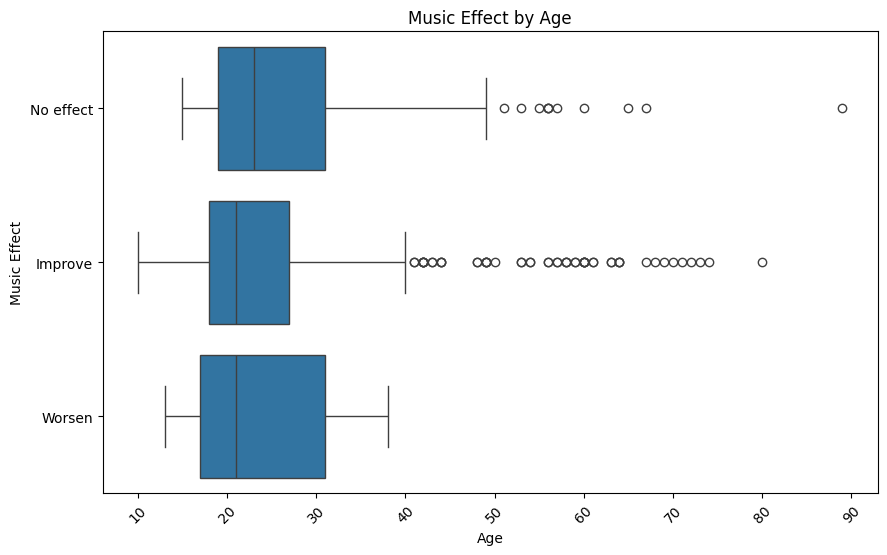

In [95]:
# Box Plot – Relationship between music effect and age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Music effects', data=df)
plt.title('Music Effect by Age')
plt.xlabel('Age')
plt.ylabel('Music Effect')
plt.xticks(rotation=45)
plt.show()

Based on the box plot, younger respondents are more likely to report that music either improves or worsens their mental state, while older respondents tend to experience no significant effect. There is also greater variability in the music's impact on younger respondents compared to older respondants.

### Correlations between Frequencies and Other Features

In [96]:
# Find unique values in the frequency columns
unique_frequency = df['Frequency [Classical]'].unique()
print(unique_frequency)

['Rarely' 'Sometimes' 'Never' 'Very frequently']


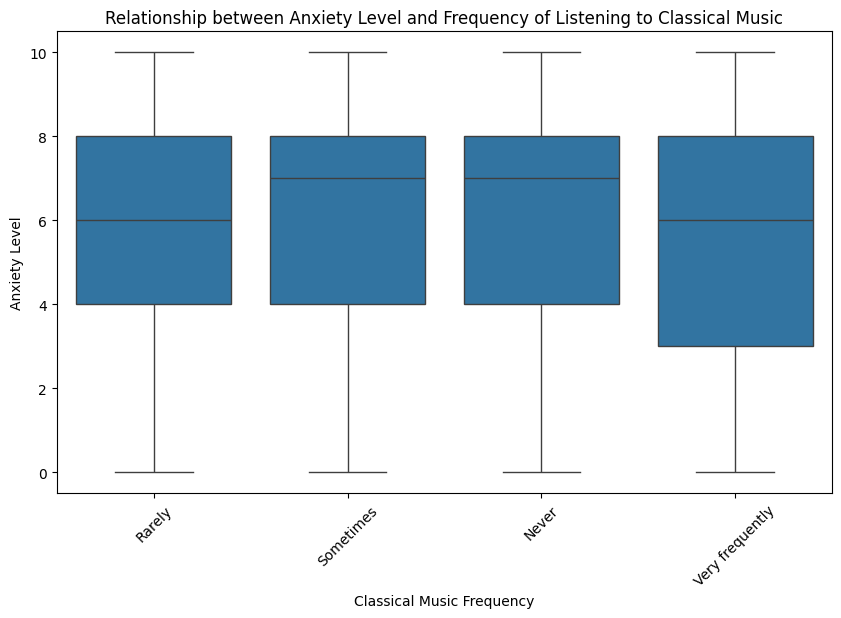

In [97]:
# Box Plot – Relationship between Anxiety and Classical Music Frequency
plt.figure(figsize=(10,6))
sns.boxplot(x='Frequency [Classical]', y='Anxiety', data=df)
plt.title('Relationship between Anxiety Level and Frequency of Listening to Classical Music')
plt.xlabel('Classical Music Frequency')
plt.ylabel('Anxiety Level')
plt.xticks(rotation = 45)
plt.show()

The box plot indicates that anxiety levels are fairly consistent across different frequencies of listening to classical music. There is no strong evidence from this plot that listening to classical music more or less frequently is associated with significant changes in anxiety levels. This goes similarly for other music genres, so we should find other ways to determine the correlation between frequencies of listening to a music genre and mental health levels.

### Correlations between Mental Health Levels and Other Features

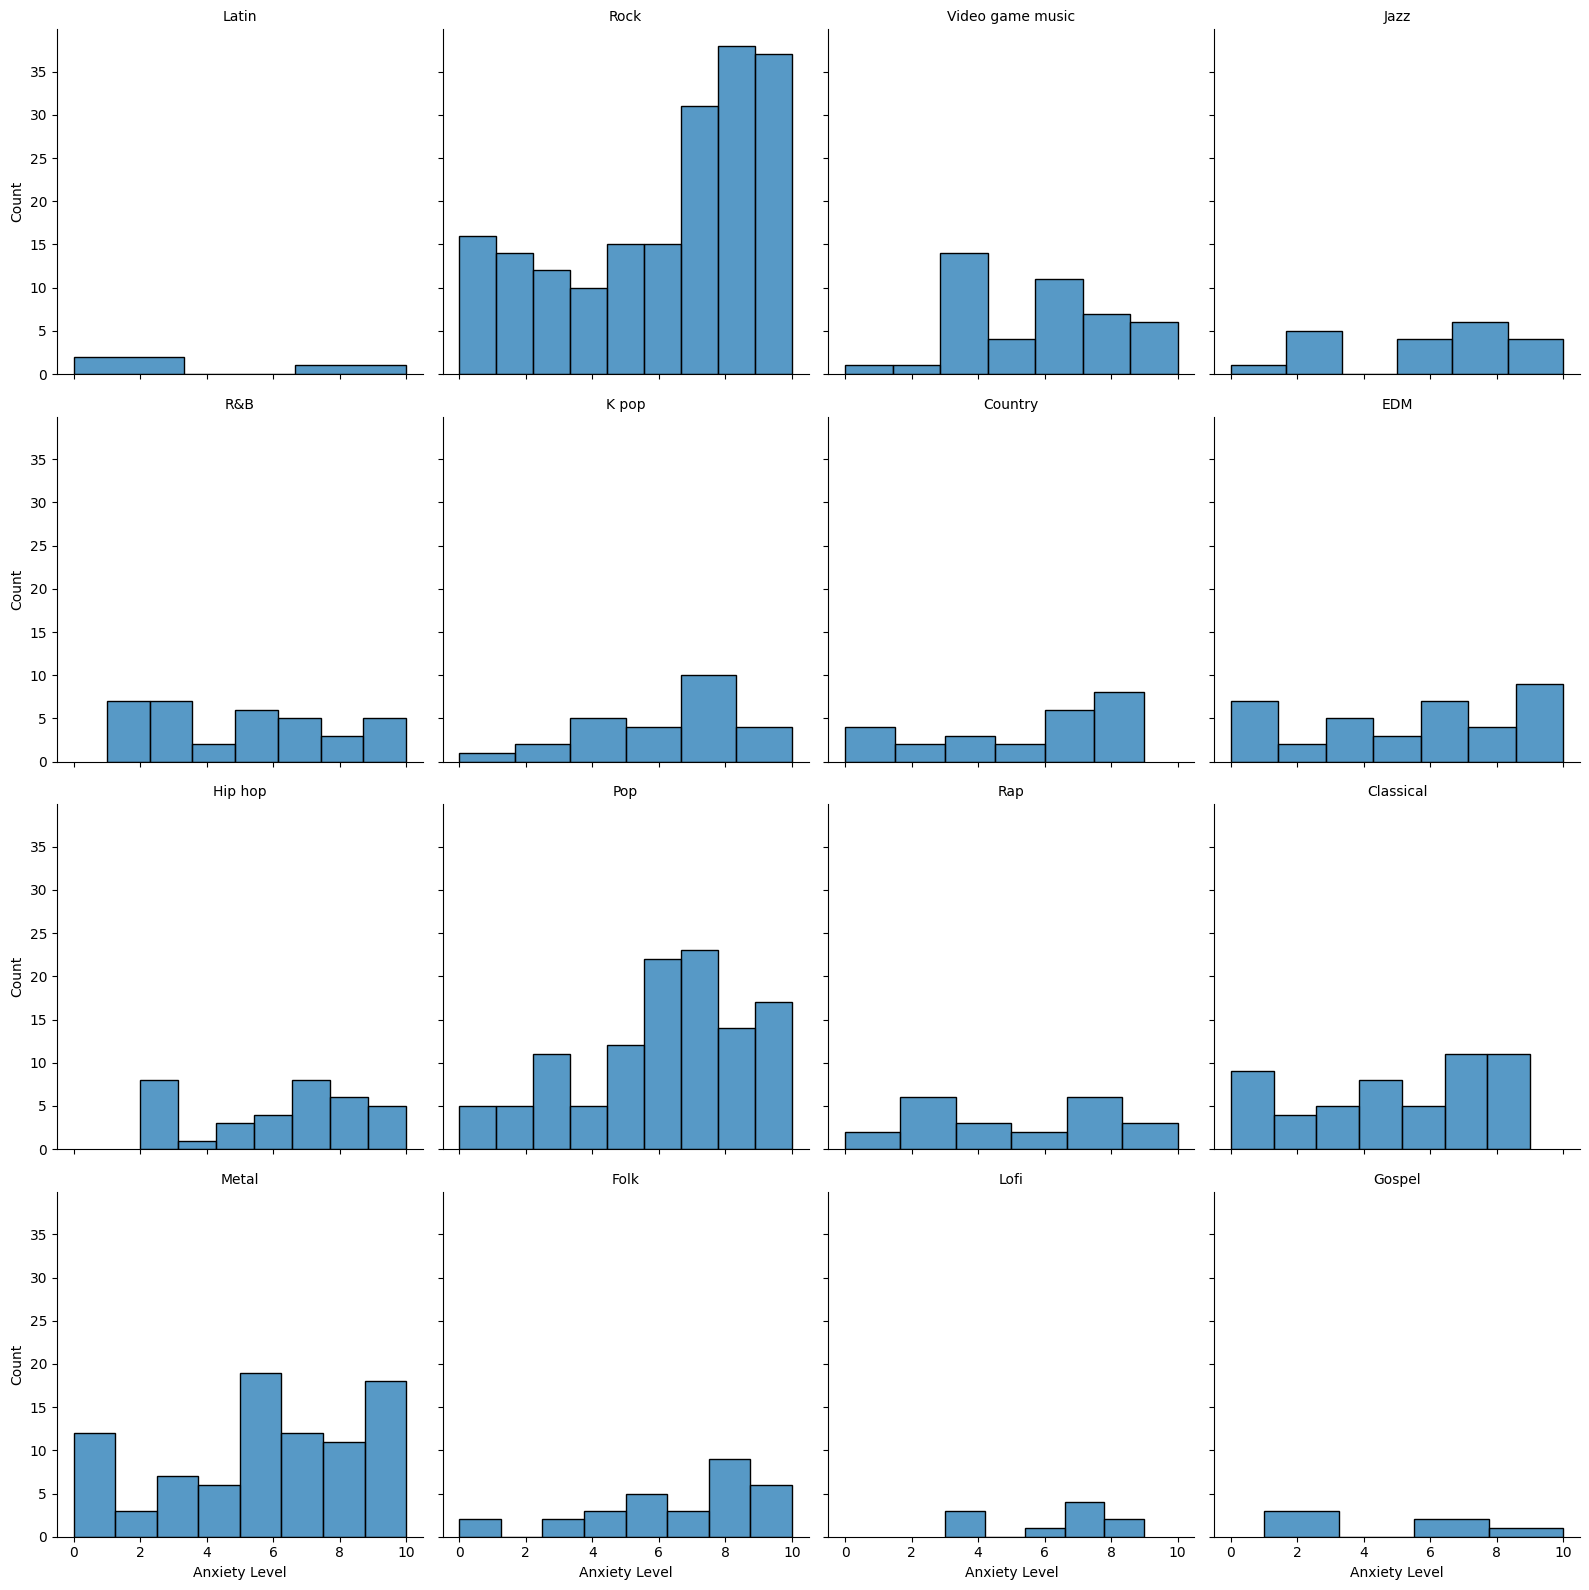

In [98]:
# Facet Grid of Histograms – Relationship between anxiety level and favorite genre
g = sns.FacetGrid(df, col='Fav genre', col_wrap=4, height=4)
g.map(sns.histplot, 'Anxiety')
g.set_titles('{col_name}')
g.set_axis_labels('Anxiety Level', 'Count')
plt.show()


According to the histograms above, genres like Rock, Gospel, and K-pop tend to be associated with higher anxiety levels, while Folk, Classical, and Jazz seem to have more respondents in the lower to moderate anxiety levels.


### Regarding Permissions of the Survey
At the end of the survey, the respondants were asked if they understood the permission to release their answers.
We need to check if there is anyone who didn't answer "I understand".

In [99]:
# Check if there is an answer other than "I understand" in Permissions
not_permitted = df['Permissions'] != 'I understand.'

not_permitted_df = df[not_permitted]

print(not_permitted_df)

Empty DataFrame
Columns: [Timestamp, Age, Primary streaming service, Hours per day, While working, Instrumentalist, Composer, Fav genre, Exploratory, Foreign languages, BPM, Frequency [Classical], Frequency [Country], Frequency [EDM], Frequency [Folk], Frequency [Gospel], Frequency [Hip hop], Frequency [Jazz], Frequency [K pop], Frequency [Latin], Frequency [Lofi], Frequency [Metal], Frequency [Pop], Frequency [R&B], Frequency [Rap], Frequency [Rock], Frequency [Video game music], Anxiety, Depression, Insomnia, OCD, Music effects, Permissions]
Index: []

[0 rows x 33 columns]


Thus, there is no respondant who didn't permit their data release.

### Some Other Features of Variables Used in Future Analysis

In [100]:
# Find median of BPM
print("Median of BPM is:", df['BPM'].median())

Median of BPM is: 120.0


In [101]:
# Examine distribution of BPM
df['BPM'].describe()

count    6.290000e+02
mean     1.589948e+06
std      3.987261e+07
min      0.000000e+00
25%      1.000000e+02
50%      1.200000e+02
75%      1.440000e+02
max      1.000000e+09
Name: BPM, dtype: float64

In [102]:
# Find mode of Primary Streaming Service
print("Mode of Primary Streaming Service is:", df['Primary streaming service'].mode())

Mode of Primary Streaming Service is: 0    Spotify
Name: Primary streaming service, dtype: object


### Visualize Outliers in Hours Per Day using Box Plots

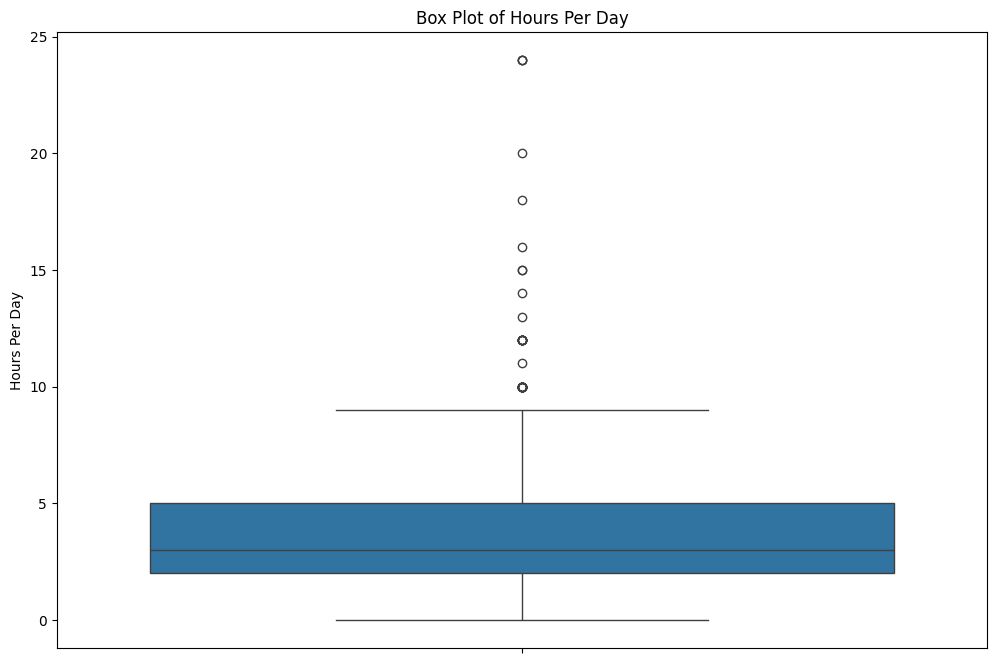

In [103]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a boxplot for the Age column
sns.boxplot(y=df['Hours per day'])

plt.title('Box Plot of Hours Per Day')
plt.ylabel('Hours Per Day')

plt.show()

### Find Outliers

#### Using Z-Score

In [104]:
# Calculate the Z-score
from scipy import stats
import numpy as np
z_hours_per_day = np.abs(stats.zscore(df['Hours per day']))
print(z_hours_per_day)

0      0.189270
1      0.684951
2      0.141184
3      0.354497
4      0.141184
         ...   
731    0.519724
732    0.850178
733    0.802091
734    0.471638
735    0.519724
Name: Hours per day, Length: 736, dtype: float64


In [105]:
# Removal of Outliers with Z-score
threshold_z = 2

outliers_indices = np.where(z_hours_per_day > threshold_z)[0]
no_outliers = df.drop(outliers_indices)
print("Original DataFrame Shape: ", df.shape)
print("DataFrame Shape after Removing Outliers: ", no_outliers.shape)

Original DataFrame Shape:  (736, 33)
DataFrame Shape after Removing Outliers:  (696, 33)


#### Using IQR

In [106]:
# Calculate quartiles to find the lower and upper bounds
q1 = df['Hours per day'].quantile(0.25)
q3 = df['Hours per day'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Find outliers
lower_outliers = df[(df['Hours per day']) < lower_bound]
upper_outliers = df[(df['Hours per day']) > upper_bound]

# Combine the outliers
outliers_hrs_per_day = pd.concat([lower_outliers, upper_outliers])

# Check if outliers were found:
if outliers_hrs_per_day.empty:
    print("No outliers found in 'Hours per day")
else:
    print("Outliers of Hours Per Day are:")
    print(outliers_hrs_per_day)

Outliers of Hours Per Day are:
               Timestamp   Age          Primary streaming service  \
17    8/27/2022 23:39:49  16.0                            Spotify   
18    8/27/2022 23:40:55  17.0                            Spotify   
26     8/28/2022 4:40:36  14.0                            Spotify   
53    8/28/2022 12:53:01  23.0                            Spotify   
77    8/28/2022 14:08:57  19.0                            Spotify   
95    8/28/2022 14:59:05  22.0                            Spotify   
125   8/28/2022 17:15:18  22.0                            Spotify   
142   8/28/2022 18:13:47  27.0                            Spotify   
164   8/28/2022 19:04:26  27.0                            Spotify   
223   8/28/2022 22:06:46  18.0                      YouTube Music   
257    8/29/2022 0:05:09  21.0                            Spotify   
280    8/29/2022 2:06:14  14.0            Other streaming service   
290    8/29/2022 2:46:27  27.0                            Spotify   
320

In [107]:
num_outliers = len(outliers_hrs_per_day)

print("Number of outliers of Hours per day:", num_outliers)

Number of outliers of Hours per day: 40
